Kamil Pieprzycki

In [ ]:
import keras
import numpy as np


In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


Task 1 Please check the number of training and testing example.




In [ ]:
print (f"Train images count: {len(train_data)}")
print (f"Test images count: {len(test_data)}")


Train images count: 25000
Test images count: 25000


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


x_test.shape

(25000, 10000)

In [ ]:
print (f"Train labels count: {len(train_labels)}")
print (f"Test labels count: {len(test_data)}")


Train labels count: 25000
Test labels count: 25000


In [ ]:
from keras import models
from keras import layers

input_shape_ = (x_test.shape[1],)

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=input_shape_))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split


X_validate, X_test, Y_validate, Y_test = train_test_split(x_test, y_test, test_size = 0.6)
X_train = x_train
Y_train = y_train
print(X_validate.shape)

print(X_test.shape)

print(Y_validate.shape)

print(Y_test.shape)

(10000, 10000)
(15000, 10000)
(10000,)
(15000,)


In [ ]:
mama = network.fit(x=X_train, y=Y_train, epochs= 20, batch_size=512, validation_data=(X_validate, Y_validate))

Epoch 1/20
49/49 [==============================] - 4s 71ms/step - loss: 0.4631 - accuracy: 0.8121 - val_loss: 0.3406 - val_accuracy: 0.8796
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2726 - accuracy: 0.9040 - val_loss: 0.2870 - val_accuracy: 0.8906
Epoch 3/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2129 - accuracy: 0.9240 - val_loss: 0.2823 - val_accuracy: 0.8876
Epoch 4/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1834 - accuracy: 0.9335 - val_loss: 0.2934 - val_accuracy: 0.8832
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1594 - accuracy: 0.9431 - val_loss: 0.3325 - val_accuracy: 0.8719
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1423 - accuracy: 0.9506 - val_loss: 0.3263 - val_accuracy: 0.8749
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1302 - accuracy: 0.9560 - val_loss: 0.3379 - val_accuracy: 0.8730
Epoch 8/20
49

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
net_dict=mama.history
net_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

def plot_net(mama):
  plot_dict_loss= ['loss','val_loss']
  plot_dict_acc= ['accuracy','val_accuracy']

  test= plot_dict_loss[0]
  epochs_num = len(mama.history[test])
  epochs_list =[x for x in range(1,epochs_num+1)]

  fig, axs = plt.subplots(1,2,figsize=(10,5))
  for elem in plot_dict_loss:
    axs[0].plot(epochs_list, mama.history[elem],label=elem)
  for elem in plot_dict_acc:
    axs[1].plot(epochs_list, mama.history[elem],label=elem)


  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss')
  axs[0].legend()


  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')
  axs[1].legend()

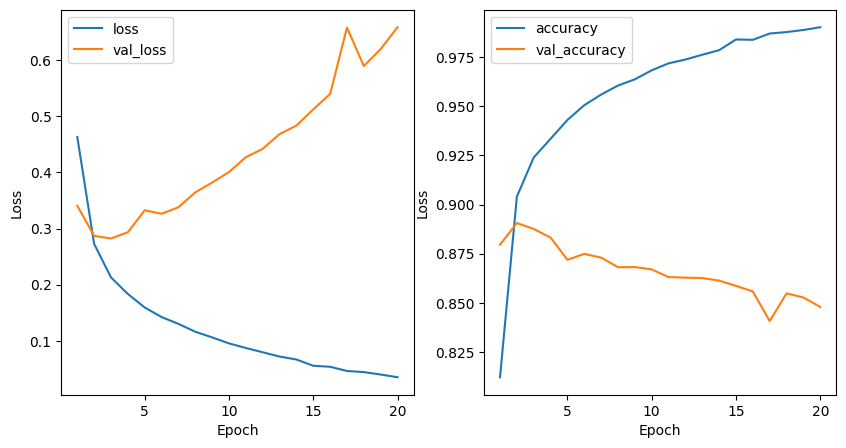

In [ ]:
plot_net(mama)